In [1]:
import os
import numpy 
from nibabel.testing import data_path
from nilearn import plotting
import nibabel as nib

In [2]:
sample_image = '/home/jaume/Documentos/DL_postgraduate/final_project/sample_data/imagesTr/pancreas_001.nii.gz'
img = nib.load(sample_image)

(512, 512, 110)

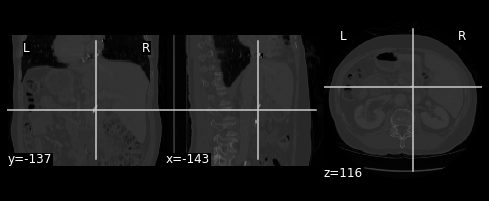

In [4]:
plotting.plot_anat(img)
img.shape